# This is a simple 'Multi' Linear Regression project, I have few independant variables and a dependant variable(House Prices), the model will be predicting this one.
# Later more variables will be added to the project to make the data more big and interesting.


In [4]:
##Importing the relevant Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns;

Matplotlib is building the font cache; this may take a moment.


In [10]:
data = pd.read_excel("Data Science source data/Multivariable House Prices.xlsx")

In [12]:
data.head()

,Area,Bedroom,Age,House Price,RandomFeature1,Price per Sq Ft,House Age,Bathrooms,Parking,Location_Suburb,Location_Urban,Condition_Good,RandomFeature2,Condition_Fair,Condition_Poor
0,2600,3.0,20,550000,0.372,211.54,2025-2005=20,2,1,1,0,1,0.758,0,0
1,3000,4.0,15,565000,0.157,188.33,2025-2010=15,3,0,0,1,0,0.647,1,0
2,3200,3.0,18,610000,0.356,190.63,2025-2007=18,2,1,0,0,1,0.433,0,0
3,3600,3.0,30,595000,0.211,165.28,2025-1995=30,2,1,0,1,0,0.952,0,1
4,4000,5.0,8,760000,0.501,190.00,2025-2017=8,3,1,0,0,0,0.642,1,0


In [13]:
data.isnull().sum()

Area               0
Bedroom            1
Age                0
House Price        0
RandomFeature1     0
Price per Sq Ft    0
House Age          0
Bathrooms          0
Parking            0
Location_Suburb    0
Location_Urban     0
Condition_Good     0
RandomFeature2     0
Condition_Fair     0
Condition_Poor     0
dtype: int64

In [14]:
#replace Nan values with with median()
data['Bedroom'] = data['Bedroom'].fillna(data['Bedroom'].median())

In [15]:
#drop the column that might cause multicollinearity e.g House Age and irrelant independant variables
data.drop(columns = ['House Age','RandomFeature1','Price per Sq Ft','RandomFeature2'], inplace=True)

In [16]:
#Calculate the correlation coefficients between all pairs of independent variables - to check multicollinerity
correlation_matrix = data.drop(columns='House Price').corr()
correlation_matrix

,Area,Bedroom,Age,Bathrooms,Parking,Location_Suburb,Location_Urban,Condition_Good,Condition_Fair,Condition_Poor
Area,1.000000,0.658398,-0.341341,0.252002,0.185405,-0.125054,-0.308957,0.186339,-0.339860,0.289380
Bedroom,0.658398,1.000000,-0.756218,0.621577,0.005584,0.135246,-0.413047,0.111111,-0.076267,-0.060193
Age,-0.341341,-0.756218,1.000000,-0.530510,0.042815,-0.324337,0.536558,0.081144,-0.206878,0.234446
Bathrooms,0.252002,0.621577,-0.530510,1.000000,-0.237450,0.010721,-0.123286,0.027156,0.047932,-0.137308
Parking,0.185405,0.005584,0.042815,-0.237450,1.000000,0.168623,-0.079352,0.301511,-0.354787,0.108893
Location_Suburb,-0.125054,0.135246,-0.324337,0.010721,0.168623,1.000000,-0.298701,0.230283,-0.045162,-0.332674
Location_Urban,-0.308957,-0.413047,0.536558,-0.123286,-0.079352,-0.298701,1.000000,-0.098693,0.116131,-0.035644
Condition_Good,0.186339,0.111111,0.081144,0.027156,0.301511,0.230283,-0.098693,1.000000,-0.849837,-0.240772
Condition_Fair,-0.339860,-0.076267,-0.206878,0.047932,-0.354787,-0.045162,0.116131,-0.849837,1.000000,-0.306925
Condition_Poor,0.289380,-0.060193,0.234446,-0.137308,0.108893,-0.332674,-0.035644,-0.240772,-0.306925,1.000000


In [17]:
#There's multi coll risk in the columns == Condition* drop _Fair column
data.drop(columns='Condition_Fair', inplace=True)

In [18]:
#Run VIF check to quantify multicollinearity:  VIF(X) = 1 - R^2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = data.drop(columns='House Price')  # Exclude target
X = add_constant(X)         # Add constant for intercept

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,Variable,VIF
0,const,184.152264
1,Area,2.755175
2,Bedroom,5.205187
3,Age,4.170526
4,Bathrooms,2.036902
5,Parking,1.305352
6,Location_Suburb,1.520766
7,Location_Urban,1.699486
8,Condition_Good,1.611294
9,Condition_Poor,1.654788


#All VIF values are below threshold 10, even bedroom is still acceptable, Ignore constant

# Show different visualizations

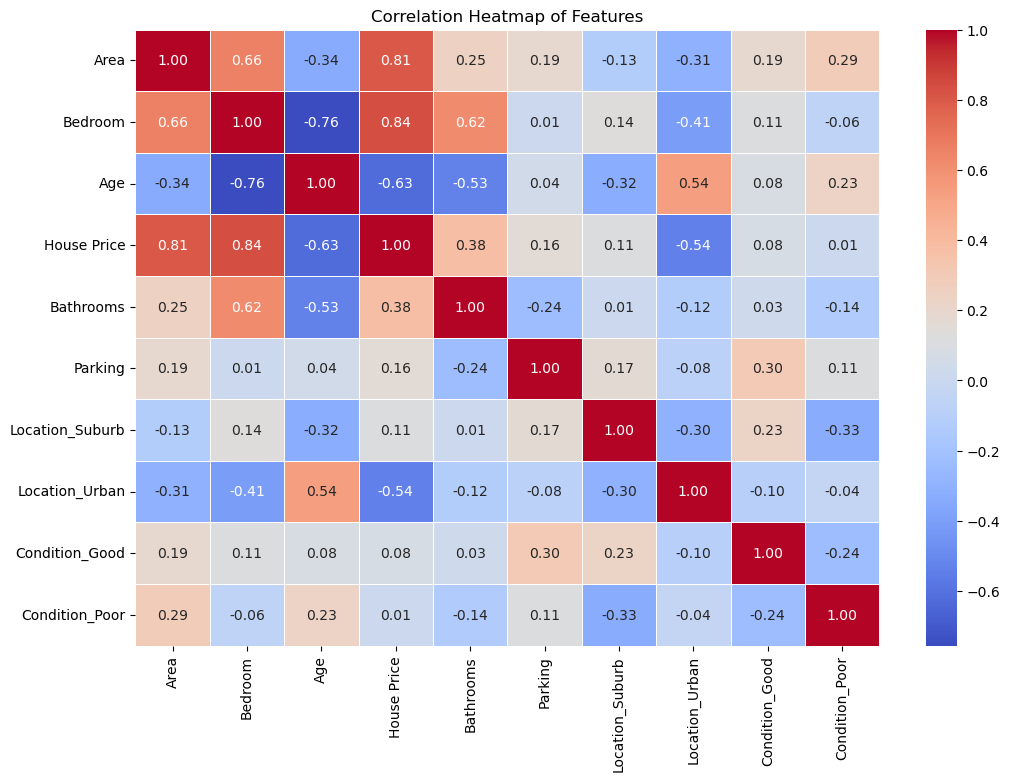

In [19]:
#compute the correlation matrix after dropping the column(s)
correlation_matrix = data.corr()

#Plot the heatmap using the updated correlation matrix
%matplotlib inline
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Here is the correlation coefficients between variables. The high values indicate strong relationship, Accprding to VIF, there seems to be multicollinearity between Age and Bedroom. Age var might be dropped later.

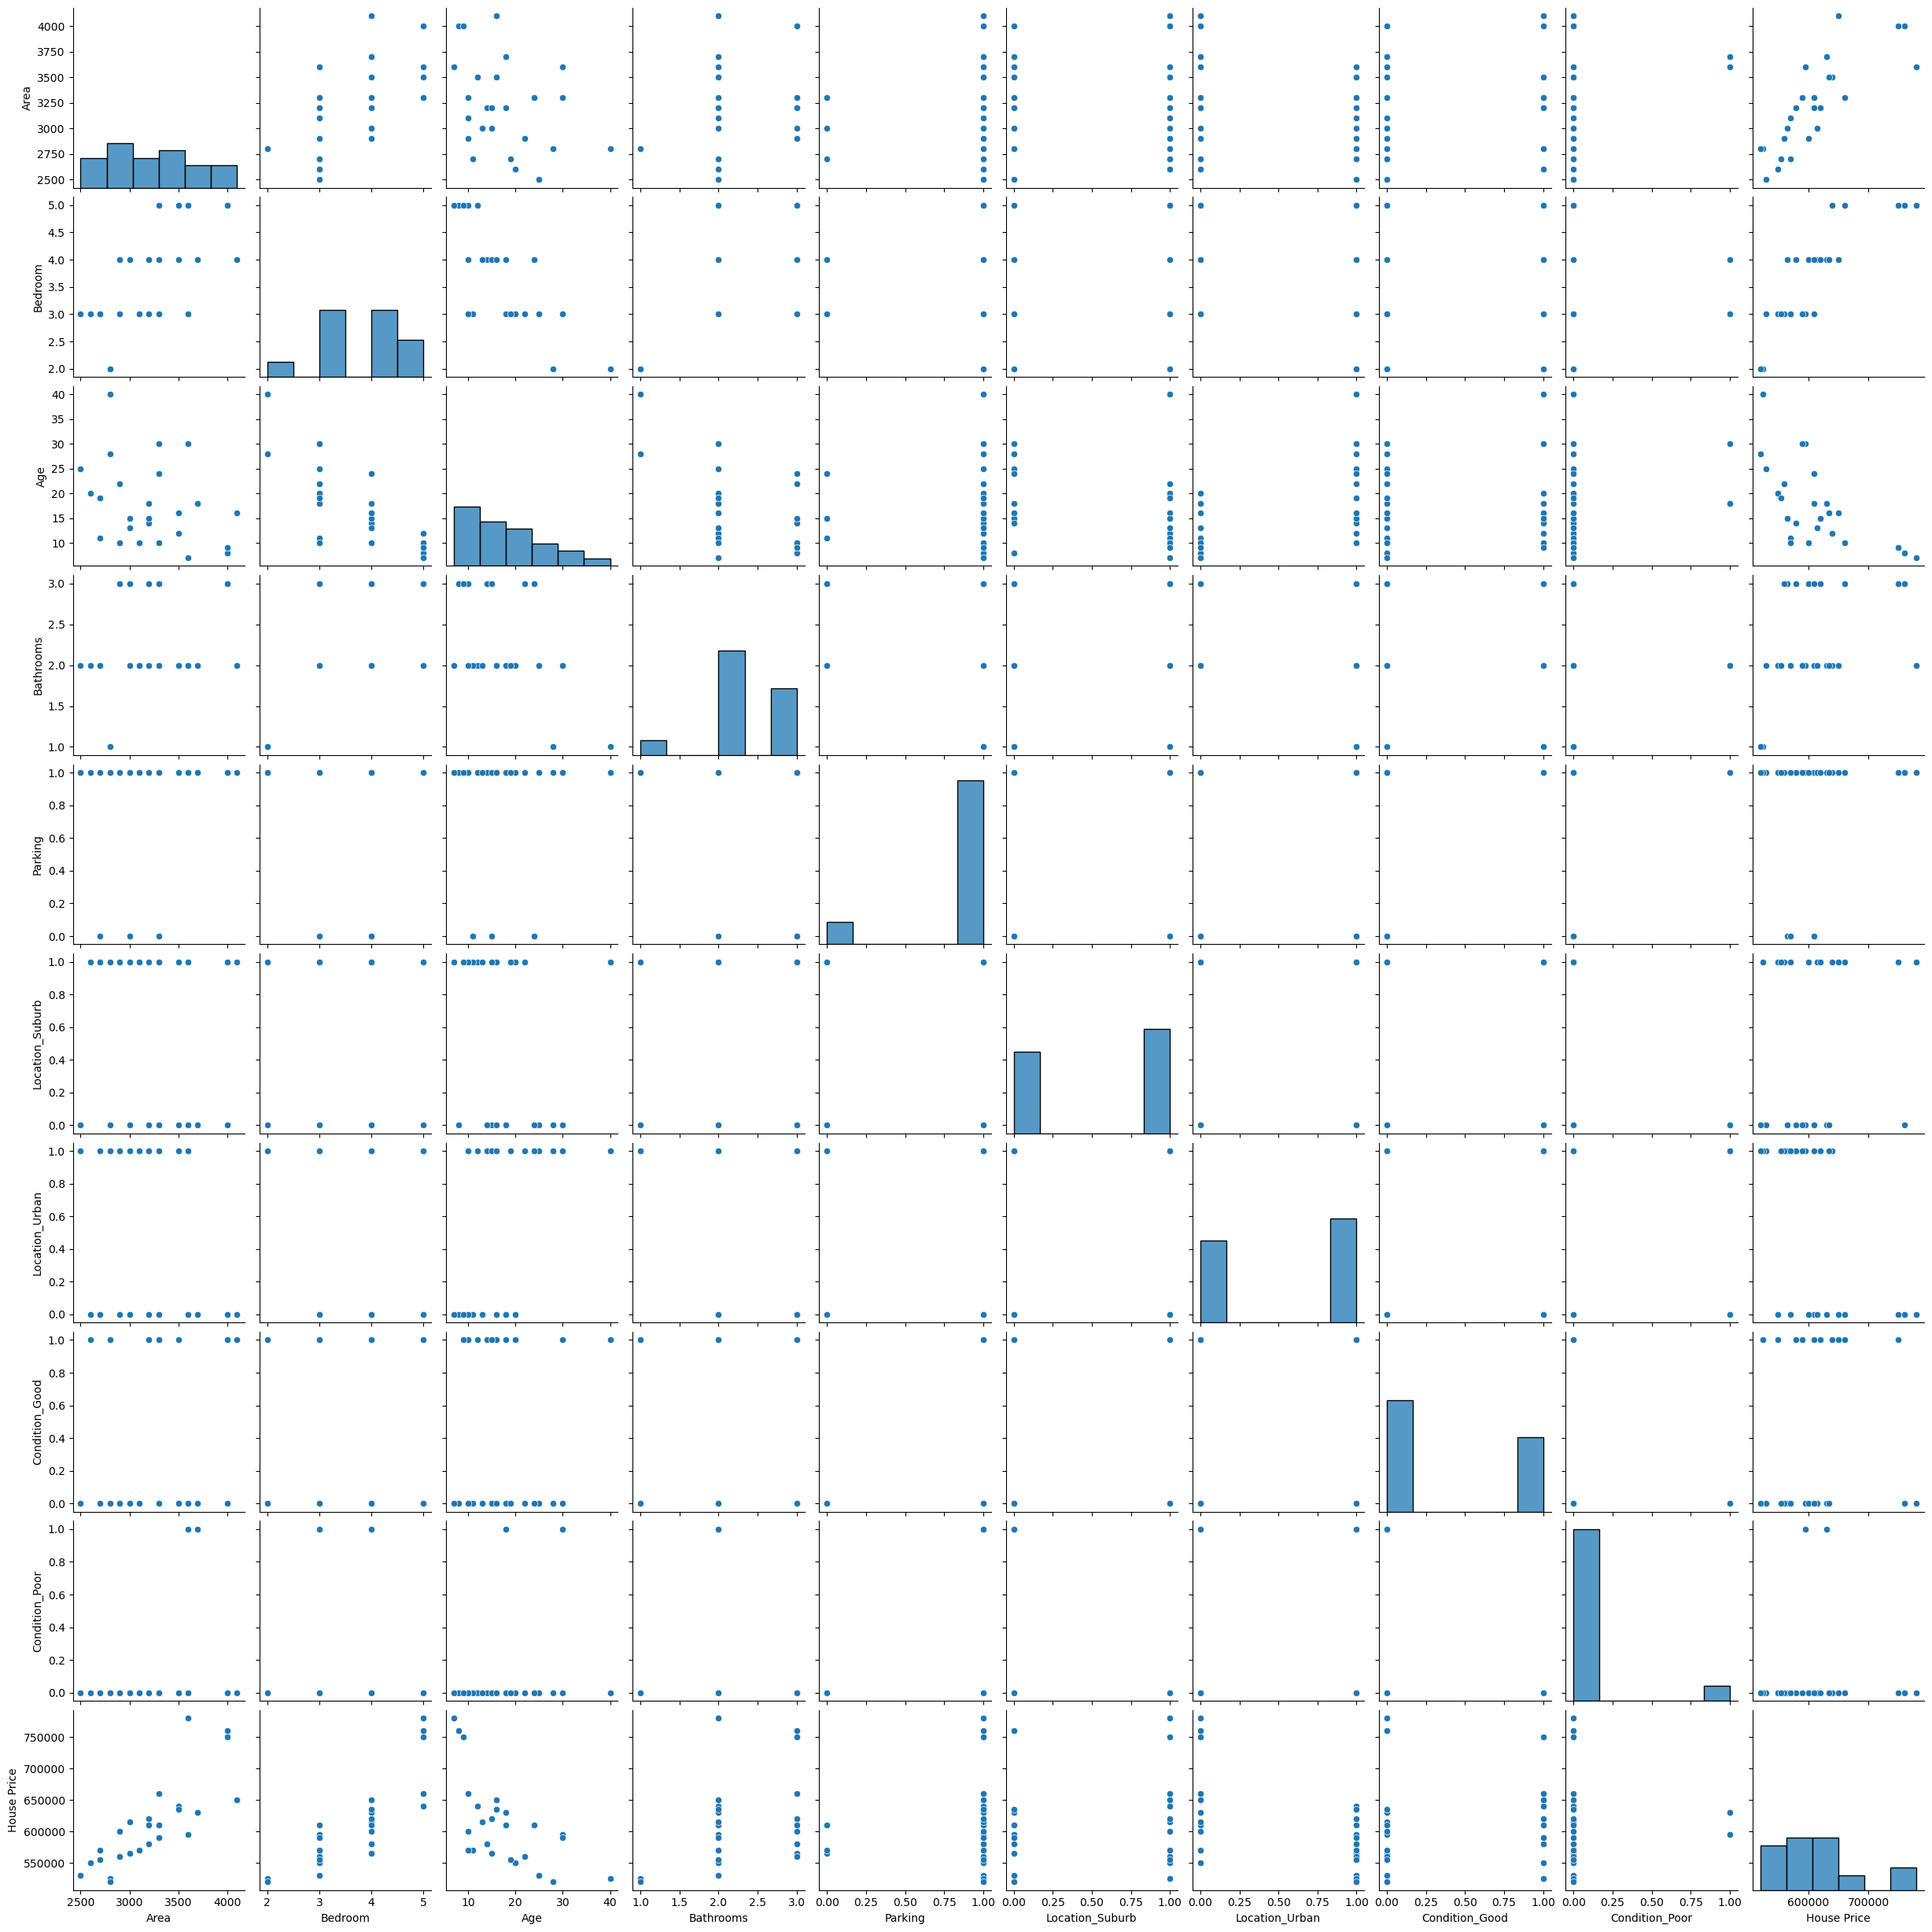

In [20]:
# Visualize using the Pairplot
sns.pairplot(data[['Area', 'Bedroom', 'Age', 'Bathrooms', 'Parking', 
                 'Location_Suburb', 'Location_Urban', 'Condition_Good','Condition_Poor', 'House Price']])
plt.show()

# Train/Fit the LR Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#separate features and target 

X = data.drop(columns=['House Price','Age']) #drop the Age var
y = data['House Price']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the LR model
'''model = LinearRegression()
model.fit(X_train,y_train)'''

#Create a Ridge model pipeline with scaling
#Regularization to prevent overfitting
ridge = make_pipeline(
    StandardScaler(),RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
)

#Retrain the model, Ridge model - R2 score was bad, Dropped 'Age" now retraining
ridge.fit(X_train,y_train)

#Evaluate this model
print("Ridge (Train) R²:", ridge.score(X_train, y_train))
print("Ridge (Test) R²:", ridge.score(X_test, y_test))

#Evaluation on training data, using mse
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared Error(mse): ', mse)


Ridge (Train) R²: 0.8699972811007601
Ridge (Test) R²: 0.6103095136873423
The Mean Squared Error(mse):  851084022.1068443


In [24]:
rmse = np.sqrt(851084022.1068443)
print("RMSE:", rmse)

RMSE: 29173.344376448244


R² of 0.61 on the test data looks solid, the model is now explaining 61% of the variance in the test data, which is much better than the negative values earlier (like -0.08 and -0.62). #Before regularization.

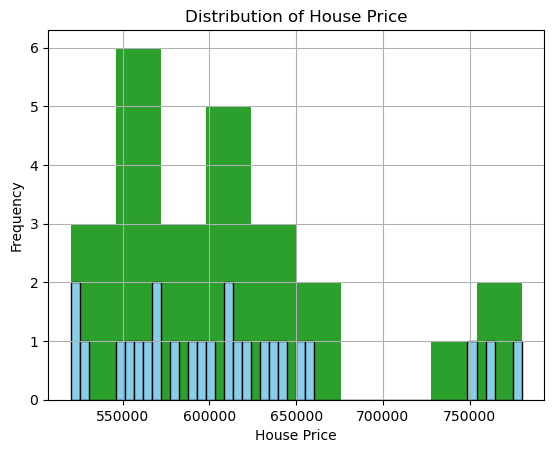

In [30]:
# check for skewedness , imbalance can bad
import matplotlib.pyplot as plt

# Plot histogram of House Price
plt.hist(y, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Price')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()


# Performance Review, Check Residuals

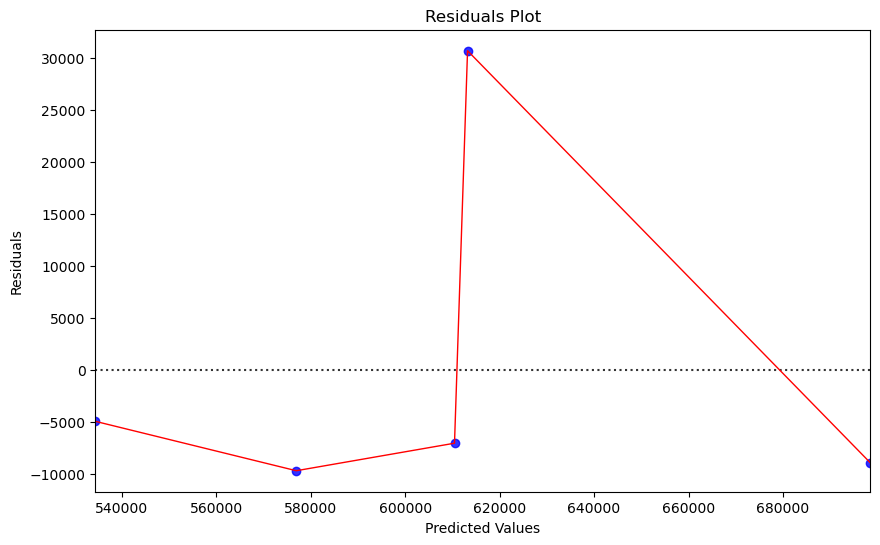

In [25]:
# Calculate residuals
y_pred = ridge.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [127]:
#Recheck the VIF after dropping Age variable
X = data.drop(columns=['House Price','Age'])  # Exclude target and Age var
X = add_constant(X)       

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,Variable,VIF
0,const,101.080149
1,Area,2.742684
2,Bedroom,3.737978
3,Bathrooms,1.964636
4,Parking,1.294756
5,Location_Suburb,1.440655
6,Location_Urban,1.372958
7,Condition_Good,1.323499
8,Condition_Poor,1.492216


#Now the VIF is showing good results after dropping Age var(Xi)


In [2]:
#that 610800 is the average price of the house
relative_error = 29173.344376448244/610800*100
print('Relative error is : ', relative_error,'%')

Relative error is :  4.776251535109405 %


# My Intepretation:
- The model predictions are off by ~ 29000 on average
- This is only about 4.8% of the average house price, which seems reasonable for regression model, especially using a linear model.
- Combined with Test R^2 = 0.61, his suggests the model is accurate.

In [137]:
# Manually predict the price of the house
'''test_input = np.array([[x1, x2, x3 ....,xn]])

prediction = ridge.predict(test_input)
print("Predicted price:", prediction[0])'''


'test_input = np.array([[x1, x2, x3 ....,xn]])\n\nprediction = ridge.predict(test_input)\nprint("Predicted price:", prediction[0])'